In [1]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import re
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


# 1. Getting to know about Data

In [2]:
# File paths

# File paths
train_accounts_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\train\accounts_data_train.json"
train_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\train\enquiry_data_train.json"
train_flag_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\train\train_flag.csv"

test_accounts_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\test\accounts_data_test.json"
test_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\test\enquiry_data_test.json"
test_flag_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\test\test_flag.csv"


# handling Json data functions

""" FUNCTION_1: fixing accounts data"""

def accounts_to_df(df, uid_column="uid"):
    reshaped = []
    for idx, row in df.iterrows():
        uid = row[uid_column] if uid_column in df.columns else idx
        for acc in row:
            if isinstance(acc, dict):
                acc_record = {"uid": uid}
                acc_record.update(acc)
                reshaped.append(acc_record)
    return pd.DataFrame(reshaped)

""" FUNCTION_2: fixing enquiry data"""
def enquiry_to_df(df, uid_column="uid"):
    reshaped = []
    for idx, row in df.iterrows():
        uid = row[uid_column] if uid_column in df.columns else idx
        for enq in row:
            if isinstance(enq, dict):
                enq_record = {"uid": uid}
                enq_record.update(enq)
                reshaped.append(enq_record)
    return pd.DataFrame(reshaped)


# Load all datasets
try:
    # Train datasets
    train_accounts_raw = pd.read_json(train_accounts_path)
    train_enquiry_raw = pd.read_json(train_enquiry_path)
    train_flag = pd.read_csv(train_flag_path)

    # Convert wide → flat
    train_accounts = accounts_to_df(train_accounts_raw)
    train_enquiry = enquiry_to_df(train_enquiry_raw)

    # Test datasets
    test_accounts_raw = pd.read_json(test_accounts_path)
    test_enquiry_raw = pd.read_json(test_enquiry_path)
    test_flag = pd.read_csv(test_flag_path)

    # Convert wide → flat
    test_accounts = accounts_to_df(test_accounts_raw)
    test_enquiry = enquiry_to_df(test_enquiry_raw)

    # Print shapes
    print("✓ Data loaded successfully!")
    print(f"Train Accounts: {train_accounts.shape}")
    print(f"Train Enquiry: {train_enquiry.shape}")
    print(f"Train Flag: {train_flag.shape}")
    print(f"Test Accounts: {test_accounts.shape}")
    print(f"Test Enquiry: {test_enquiry.shape}")
    print(f"Test Flag: {test_flag.shape}")


except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"Error loading data: {e}")


✓ Data loaded successfully!
Train Accounts: (1245310, 7)
Train Enquiry: (1909926, 4)
Train Flag: (261383, 3)
Test Accounts: (220013, 7)
Test Enquiry: (337662, 4)
Test Flag: (46127, 2)



Checking if all the dataframes are as per the described table format in problem PDF

In [3]:
# Set display options for clean table view
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", 2000)         # wide console table
pd.set_option("display.max_colwidth", None)  # prevent column wrapping

# Example: show train_accounts head(2) cleanly
print("Train Accounts:")
print(train_accounts.head(2).to_string(index=False), "\n")

print("Train Enquiry:")
print(train_enquiry.head(2).to_string(index=False), "\n")

print("Train Flag:")
print(train_flag.head(2).to_string(index=False), "\n")

print("Test Accounts:")
print(test_accounts.head(2).to_string(index=False), "\n")

print("Test Enquiry:")
print(test_enquiry.head(2).to_string(index=False), "\n")

print("Test Flag:")
print(test_flag.head(2).to_string(index=False), "\n")


Train Accounts:
        uid     credit_type  loan_amount  amount_overdue  open_date closed_date                                 payment_hist_string
AAA09044550 Consumer credit     272745.0             0.0 2018-09-22  2020-02-22 000000000000000000000010000000000000000000000000000
AAA09044550 Consumer credit       4500.0             0.0 2018-03-08  2019-07-25    000000000000000014044000000000000000000000000000 

Train Enquiry:
        uid         enquiry_type  enquiry_amt enquiry_date
AAA08065248     Interbank credit       168839   2020-11-08
AAA08065248 Mobile operator loan       268392   2020-09-20 

Train Flag:
        uid NAME_CONTRACT_TYPE  TARGET
XDA69787158         Cash loans       0
BSE47789733         Cash loans       0 

Test Accounts:
        uid     credit_type  loan_amount  amount_overdue  open_date closed_date      payment_hist_string
AAA14437029 Consumer credit     31630.50             0.0 2014-03-30  2014-11-29 000000000000000000000000
AAA14437029 Consumer credit     1461

This confirms all tables are in same format as mentioned in problem statement

In [4]:
""" FUNCTION_3: data quality check"""

import pandas as pd

def summarize_dataframe(df, name="DataFrame"):
    print(f"\n Summary for {name}")
    print("-" * 60)

    # Shape
    print(f"Shape: {df.shape}")

    # Columns
    print(f"Columns: {list(df.columns)}\n")

    # Data types
    print("Data Types:")
    print(df.dtypes)
    print()

    # Missing values
    missing = df.isnull().sum()
    missing_perc = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({"Missing": missing, "Missing (%)": missing_perc})
    missing_df = missing_df[missing_df["Missing"] > 0]  # filter non-missing
    print("Missing Values:")
    if missing_df.empty:
        print("None\n")
    else:
        print(missing_df, "\n")

    # Duplicates (with %)
    dup_count = df.duplicated().sum()
    dup_perc = round((dup_count / len(df)) * 100, 2)
    print(f"Duplicate Rows: {dup_count} ({dup_perc}%)\n")

    # Unique values per column
    unique_counts = df.nunique()
    print("Unique Values per Column:")
    print(unique_counts)
    print("=" * 60)


In [5]:
# Train Summary
summarize_dataframe(train_accounts, "Train Accounts")
summarize_dataframe(train_enquiry, "Train Enquiry")
summarize_dataframe(train_flag, "Train Flag")



 Summary for Train Accounts
------------------------------------------------------------
Shape: (1245310, 7)
Columns: ['uid', 'credit_type', 'loan_amount', 'amount_overdue', 'open_date', 'closed_date', 'payment_hist_string']

Data Types:
uid                     object
credit_type             object
loan_amount            float64
amount_overdue         float64
open_date               object
closed_date             object
payment_hist_string     object
dtype: object

Missing Values:
             Missing  Missing (%)
loan_amount        3         0.00
closed_date   463035        37.18 

Duplicate Rows: 6411 (0.51%)

Unique Values per Column:
uid                    223918
credit_type                15
loan_amount            189286
amount_overdue           1266
open_date                2923
closed_date              2913
payment_hist_string     45212
dtype: int64

 Summary for Train Enquiry
------------------------------------------------------------
Shape: (1909926, 4)
Columns: ['uid', 'enq

**Accounts (~1.25M × 7)**

223K users, multiple credit lines each.

closed_date missing for 37% → open accounts.

*3 missing in loan_amount → trivial fix.*

*6.4K duplicate rows (0.51%) → check exactness.*



**Enquiry (~1.9M × 4)**

261K users → clean 1:N with accounts.

Just 9 dups → negligible.

17 enquiry types + amounts + dates → good behavioral signal.

**Flag (261K × 3)**

One row per user: contract type + binary target.

No missing, no dups → label-ready.



In [6]:
#Test Summary
summarize_dataframe(test_accounts, "Test Accounts")
summarize_dataframe(test_enquiry, "Test Enquiry")
summarize_dataframe(test_flag, "Test Flag")


 Summary for Test Accounts
------------------------------------------------------------
Shape: (220013, 7)
Columns: ['uid', 'credit_type', 'loan_amount', 'amount_overdue', 'open_date', 'closed_date', 'payment_hist_string']

Data Types:
uid                     object
credit_type             object
loan_amount            float64
amount_overdue         float64
open_date               object
closed_date             object
payment_hist_string     object
dtype: object

Missing Values:
             Missing  Missing (%)
closed_date    81636        37.11 

Duplicate Rows: 1104 (0.5%)

Unique Values per Column:
uid                    39572
credit_type               12
loan_amount            58104
amount_overdue           317
open_date               2922
closed_date             2854
payment_hist_string    11948
dtype: int64

 Summary for Test Enquiry
------------------------------------------------------------
Shape: (337662, 4)
Columns: ['uid', 'enquiry_type', 'enquiry_amt', 'enquiry_date']

Da

**Test Accounts (~220K × 7)**

39K users → ~5.5 accounts each (train-like).

closed_date missing 37% → open accounts.

1.1K duplicates → clean same as train.

12 credit types vs 15 in train → category mismatch to align.

**Test Enquiry (~338K × 4)**

46K users → ~7 enquiries each (slightly higher than train).

No duplicates → clean.

Same 17 enquiry types → check distribution for drift.

**Insights from both train and test dataframe summaries we have**
1. ignoring the account entry where loan amount is not mentioned (According to the Reserve Bank of India guidelines, NBFCs must convey in writing to the borrower by means of sanction letter the amount of loan sanctioned along with the terms and conditions. This is a mandatory regulatory requirement)
2. the duplicacy in both train and test dataset for accounts show similar percentage 0.5% which is comparably small and ignoring them dont directly affect prediction test set
3. The missing Close date means the Loan is Active so creating a flag of active with 1,0 value
4. 9 duplicates in  enquiry train dataset

In [7]:
print("Before dropping:")
print("  train_accounts :", train_accounts.shape)
print("  test_accounts  :", test_accounts.shape)
print("  train_enquiry  :", train_enquiry.shape)

# Dropping duplicates
train_accounts = train_accounts.drop_duplicates()
test_accounts = test_accounts.drop_duplicates()
train_enquiry=train_enquiry.drop_duplicates()
# dropping entries with no loan amount sanctioned
train_accounts = train_accounts.dropna(subset=["loan_amount"])
# Active flag
train_accounts["active_flag"] = train_accounts["closed_date"].isna().astype(int)
test_accounts["active_flag"]  = test_accounts["closed_date"].isna().astype(int)

print("After dropping:")
print("  train_accounts :", train_accounts.shape)
print("  test_accounts  :", test_accounts.shape)
print("  train_enquiry  :", train_enquiry.shape)


Before dropping:
  train_accounts : (1245310, 7)
  test_accounts  : (220013, 7)
  train_enquiry  : (1909926, 4)
After dropping:
  train_accounts : (1238896, 8)
  test_accounts  : (218909, 8)
  train_enquiry  : (1909917, 4)


Now Understanding each accounts and enquiry data set

In [8]:
""" analysing number of unique uids in each dataset """

print(f"Train Accounts: {train_accounts.shape}, Unique UIDs: {train_accounts['uid'].nunique()}")
print(f"Train Enquiry: {train_enquiry.shape}, Unique UIDs: {train_enquiry['uid'].nunique()}")
print(f"Train Flag: {train_flag.shape}, Unique UIDs: {train_flag['uid'].nunique()}")
print(f"Test Accounts: {test_accounts.shape}, Unique UIDs: {test_accounts['uid'].nunique()}")
print(f"Test Enquiry: {test_enquiry.shape}, Unique UIDs: {test_enquiry['uid'].nunique()}")
print(f"Test Flag: {test_flag.shape}, Unique UIDs: {test_flag['uid'].nunique()}")


Train Accounts: (1238896, 8), Unique UIDs: 223917
Train Enquiry: (1909917, 4), Unique UIDs: 261383
Train Flag: (261383, 3), Unique UIDs: 261383
Test Accounts: (218909, 8), Unique UIDs: 39572
Test Enquiry: (337662, 4), Unique UIDs: 46127
Test Flag: (46127, 2), Unique UIDs: 46127


1. no. of unique uids doesnt match for account table with enquiry and flag table for both data set 
that means  some of uids info on account are missing , lets see the per centage distibution
2. Also there are multiple uids in Account and Enquiry table which will be required to be aggregated in future

In [9]:
# Train mismatch
train_pct_missing = (train_accounts['uid'].nunique() - train_flag['uid'].nunique()) / train_accounts['uid'].nunique() * 100

# Test mismatch
test_pct_missing = (test_accounts['uid'].nunique() - test_flag['uid'].nunique()) / test_accounts['uid'].nunique() * 100

print("✓ UID Mismatch Summary")
print(f"Train: {train_pct_missing:.2f}% accounts UIDs missing in flag")
print(f"Test : {test_pct_missing:.2f}% accounts UIDs missing in flag")

✓ UID Mismatch Summary
Train: -16.73% accounts UIDs missing in flag
Test : -16.56% accounts UIDs missing in flag


**the percentage is almost similar , could be systematic error  or some of the uids are new and yet to borrow** 

# 2. Differentiating Bad from Good 

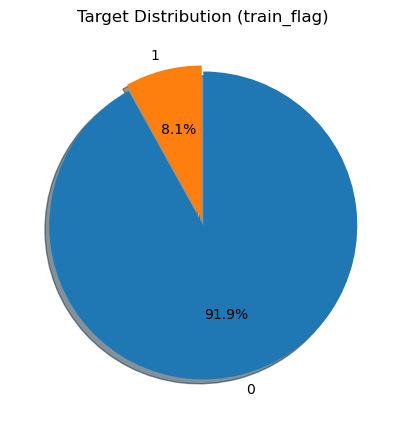

In [10]:
# ============================================
# 1. Flag pie chart (target distribution)
# ============================================
plt.figure(figsize=(5,5))
train_flag['TARGET'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    explode=[0.02,0.02],
    shadow=True
)
plt.ylabel('')
plt.title("Target Distribution (train_flag)")
plt.show()

Only 8 % are bad borrowers---> Class imbalance but we need to investigate why the are bad in first place 
1. we will extract as much feature we can from both Tables and see how bad is seprated from Good ones
2. We may end up creating multiple features but will focus on which attributes differentiates

# 2.1 Account Table ( what are the past payment trends and behaviors)

In [11]:
import numpy as np
import pandas as pd
import re

# -------------------------------------------
# 1) Simple payment features (account-level)
# -------------------------------------------
def extract_payment_features_simple(df, payment_col='payment_hist_string'):
    """
    Minimal, explainable account-level features:
    - num_installments, num_missed_installments, num_non_missed_installments
    - overdue_ratio, worst_dpd_ever, recent_worst_dpd_3m, last_month_dpd
    - dpd_30_count (30-59), dpd_60_count (60-89), dpd_90plus_count (>=90)
    """
    out = df.copy()
    n = len(out)

    num_installments = np.zeros(n)
    num_missed = np.zeros(n)
    num_non_missed = np.zeros(n)
    overdue_ratio = np.zeros(n)
    worst_dpd_ever = np.zeros(n)
    recent_worst_dpd_3m = np.zeros(n)
    last_month_dpd = np.zeros(n)

    # explicit DPD bands
    dpd_30_count = np.zeros(n)       # 30-59 DPD
    dpd_60_count = np.zeros(n)       # 60-89 DPD
    dpd_90plus_count = np.zeros(n)   # 90+ DPD

    arr = out.get(payment_col, pd.Series([None]*n)).values

    for i in range(n):
        s = arr[i]
        if pd.isna(s) or not isinstance(s, str) or len(s) == 0:
            continue

        chunks = [s[j:j+3] for j in range(0, len(s), 3) if j+3 <= len(s)]
        vals = [int(x) if x.isdigit() and len(x) == 3 else 0 for x in chunks] if chunks else []
        if not vals:
            continue

        num_installments[i] = len(vals)
        num_missed[i] = sum(v > 0 for v in vals)
        num_non_missed[i] = len(vals) - num_missed[i]
        overdue_ratio[i] = num_missed[i] / max(len(vals), 1)

        worst_dpd_ever[i] = max(vals)
        last_month_dpd[i] = vals[-1]
        recent_worst_dpd_3m[i] = max(vals[-3:]) if len(vals) >= 3 else max(vals)

        dpd_30_count[i] = sum(30 <= v <= 59 for v in vals)
        dpd_60_count[i] = sum(60 <= v <= 89 for v in vals)
        dpd_90plus_count[i] = sum(v >= 90 for v in vals)

    out['num_installments'] = num_installments
    out['num_missed_installments'] = num_missed
    out['num_non_missed_installments'] = num_non_missed
    out['overdue_ratio'] = overdue_ratio
    out['worst_dpd_ever'] = worst_dpd_ever
    out['recent_worst_dpd_3m'] = recent_worst_dpd_3m
    out['last_month_dpd'] = last_month_dpd

    out['dpd_30_count'] = dpd_30_count
    out['dpd_60_count'] = dpd_60_count
    out['dpd_90plus_count'] = dpd_90plus_count

    # On-time adherence (guard division by zero)
    denom = out['num_installments'].replace(0, np.nan)
    out['installment_adherence_ratio'] = (out['num_non_missed_installments'] / denom).fillna(0).clip(0, 1)

    # Regularly missed flag (simple policy threshold; adjust if needed)
    out['regularly_missed_flag'] = (out['overdue_ratio'] >= 0.20).astype(int)

    return out

# -------------------------------------------
# 2) Simple date/vintage features (account)
# -------------------------------------------
def extract_account_age_simple(df, open_col='open_date', now_ts=None):
    out = df.copy()
    if now_ts is None:
        now_ts = pd.Timestamp.now()
    out[open_col] = pd.to_datetime(out[open_col], errors='coerce')
    out['account_age_months'] = ((now_ts - out[open_col]).dt.days / 30.44).clip(lower=0)
    return out

# -------------------------------------------
# 3) Credit type one-hot counts (uid-level)
# -------------------------------------------
def _sanitize_name(x: str) -> str:
    x = '' if pd.isna(x) else str(x)
    x = x.strip().lower()
    x = re.sub(r'[^a-z0-9]+', '_', x)
    x = re.sub(r'_+', '_', x).strip('_')
    return x or 'unknown'

def credit_type_counts_uid(accounts_df, uid_col='uid', credit_type_col='credit_type'):
    """
    Returns a uid-level DataFrame with:
    - total_accounts
    - credit_types_count (distinct)
    - one column per credit_type with count: credit_type_COUNT_<sanitized_type>
    """
    df = accounts_df[[uid_col, credit_type_col]].copy()
    df['credit_type_sanitized'] = df[credit_type_col].apply(_sanitize_name)

    # total accounts and distinct types
    base = df.groupby(uid_col).agg(
        total_accounts=(credit_type_col, 'size'),
        credit_types_count=(credit_type_col, pd.Series.nunique)
    ).reset_index()

    # counts per type pivoted wide
    type_counts = df.groupby([uid_col, 'credit_type_sanitized']).size().reset_index(name='count')
    type_counts = type_counts.pivot(index=uid_col, columns='credit_type_sanitized', values='count').fillna(0).astype(int)

    # rename columns with standard prefix
    type_counts.columns = [f'credit_type_COUNT_{c}' for c in type_counts.columns]
    type_counts = type_counts.reset_index()

    out = base.merge(type_counts, on=uid_col, how='left')
    # fill NaNs for users with no known types (edge case)
    out = out.fillna(0)
    return out

# ----------------------------------------------------
# 4) Applicant-level (uid) aggregation - minimal set
# ----------------------------------------------------
def aggregate_to_uid_simple(accounts_df, uid_col='uid', credit_type_col='credit_type'):
    """
    Compact, explainable uid-level table:
    - Behavior: num_installments_total, num_missed_installments_total, num_non_missed_installments_total,
                overdue_ratio_mean, worst_dpd_ever_max, recent_worst_dpd_3m_max, last_month_dpd_max,
                installment_adherence_ratio_mean, regularly_missed_flag_any,
                dpd_30_count_total, dpd_60_count_total, dpd_90plus_count_total
    - Vintage: account_age_months_mean/min/max
    - Composition: total_accounts, credit_types_count, and per-credit-type counts (wide)
    """
    df = accounts_df.copy()

    agg_map = {
        'num_installments': ['sum'],
        'num_missed_installments': ['sum'],
        'num_non_missed_installments': ['sum'],
        'overdue_ratio': ['mean'],
        'worst_dpd_ever': ['max'],
        'recent_worst_dpd_3m': ['max'],
        'last_month_dpd': ['max'],
        'installment_adherence_ratio': ['mean'],
        'regularly_missed_flag': ['max'],
        'dpd_30_count': ['sum'],
        'dpd_60_count': ['sum'],
        'dpd_90plus_count': ['sum'],
        'account_age_months': ['mean', 'min', 'max']
    }

    existing = {k: v for k, v in agg_map.items() if k in df.columns}
    uid = df.groupby(uid_col).agg(existing)
    uid.columns = ['_'.join([c for c in col if c]) for col in uid.columns.to_flat_index()]
    uid = uid.reset_index()

    # Rename for clarity
    rename_map = {
        'num_installments_sum': 'num_installments_total',
        'num_missed_installments_sum': 'num_missed_installments_total',
        'num_non_missed_installments_sum': 'num_non_missed_installments_total',
        'overdue_ratio_mean': 'overdue_ratio_mean',
        'worst_dpd_ever_max': 'worst_dpd_ever_max',
        'recent_worst_dpd_3m_max': 'recent_worst_dpd_3m_max',
        'last_month_dpd_max': 'last_month_dpd_max',
        'installment_adherence_ratio_mean': 'installment_adherence_ratio_mean',
        'regularly_missed_flag_max': 'regularly_missed_flag_any',
        'dpd_30_count_sum': 'dpd_30_count_total',
        'dpd_60_count_sum': 'dpd_60_count_total',
        'dpd_90plus_count_sum': 'dpd_90plus_count_total',
        'account_age_months_mean': 'account_age_months_mean',
        'account_age_months_min': 'account_age_months_min',
        'account_age_months_max': 'account_age_months_max'
    }
    uid = uid.rename(columns=rename_map)

    # Credit type composition (wide one-hot counts)
    ct = credit_type_counts_uid(df, uid_col=uid_col, credit_type_col=credit_type_col)
    uid = uid.merge(ct, on=uid_col, how='left').fillna(0)

    # Final order (behavior, vintage, composition first; per-type counts follow)
    base_cols = [
        uid_col,
        # behavior
        'num_installments_total',
        'num_missed_installments_total',
        'num_non_missed_installments_total',
        'overdue_ratio_mean',
        'worst_dpd_ever_max',
        'recent_worst_dpd_3m_max',
        'last_month_dpd_max',
        'installment_adherence_ratio_mean',
        'regularly_missed_flag_any',
        'dpd_30_count_total',
        'dpd_60_count_total',
        'dpd_90plus_count_total',
        # vintage
        'account_age_months_mean',
        'account_age_months_min',
        'account_age_months_max',
        # composition summary
        'total_accounts',
        'credit_types_count'
    ]
    per_type_cols = sorted([c for c in uid.columns if c.startswith('credit_type_COUNT_')])
    final_cols = [c for c in base_cols if c in uid.columns] + per_type_cols
    uid = uid[final_cols]

    return uid

# -------------------------------------------
# 5) Full simple pipeline (account → uid)
# -------------------------------------------
def run_simple_feature_pipeline(accounts_df,
                                payment_col='payment_hist_string',
                                open_col='open_date',
                                credit_type_col='credit_type',
                                uid_col='uid'):
    acc = accounts_df.copy()
    acc = extract_payment_features_simple(acc, payment_col=payment_col)
    acc = extract_account_age_simple(acc, open_col=open_col)
    uid = aggregate_to_uid_simple(acc, uid_col=uid_col, credit_type_col=credit_type_col)
    return uid


In [12]:
#train
train_uid_features = run_simple_feature_pipeline(train_accounts, payment_col='payment_hist_string', open_col='open_date', credit_type_col='credit_type', uid_col='uid')
train_final_simple = train_flag.merge(train_uid_features, on='uid', how='left').fillna(0)

This created a lot of columns but we want to know which of them are significant differentiator

In [49]:
# similarily for test
test_uid_features = run_simple_feature_pipeline(test_accounts, payment_col='payment_hist_string', open_col='open_date', credit_type_col='credit_type', uid_col='uid')
test_final_simple = test_flag.merge(test_uid_features, on='uid', how='left').fillna(0)

In [14]:
train_final_simple.head()

,uid,NAME_CONTRACT_TYPE,TARGET,num_installments_total,num_missed_installments_total,num_non_missed_installments_total,overdue_ratio_mean,worst_dpd_ever_max,recent_worst_dpd_3m_max,last_month_dpd_max,installment_adherence_ratio_mean,regularly_missed_flag_any,dpd_30_count_total,dpd_60_count_total,dpd_90plus_count_total,account_age_months_mean,account_age_months_min,account_age_months_max,total_accounts,credit_types_count,credit_type_COUNT_another_type_of_loan,credit_type_COUNT_car_loan,credit_type_COUNT_cash_loan_non_earmarked,credit_type_COUNT_consumer_credit,credit_type_COUNT_credit_card,credit_type_COUNT_interbank_credit,credit_type_COUNT_loan_for_business_development,credit_type_COUNT_loan_for_purchase_of_shares_margin_lending,credit_type_COUNT_loan_for_the_purchase_of_equipment,credit_type_COUNT_loan_for_working_capital_replenishment,credit_type_COUNT_microloan,credit_type_COUNT_mobile_operator_loan,credit_type_COUNT_mortgage,credit_type_COUNT_real_estate_loan,credit_type_COUNT_unknown_type_of_loan
0,XDA69787158,Cash loans,0,39.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.645204,94.645204,94.645204,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BSE47789733,Cash loans,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,82.818660,82.818660,82.818660,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NTJ92213825,Cash loans,0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,139.027595,139.027595,139.027595,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCQ47571695,Cash loans,0,70.0,0.0,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.331143,68.035480,132.621551,3.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WJZ68772744,Cash loans,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#top correlated columns
import pandas as pd
import numpy as np

def top10_corr_with_target_only_corr(df: pd.DataFrame, target_col: str = 'TARGET'):
    """
    Uses only pandas .corr() to compute Pearson correlations between numeric columns and TARGET.
    Returns Top 10 absolute correlations (excluding TARGET itself and uid if present).
    """
    assert target_col in df.columns, f"{target_col} not found"

    # Keep only numeric columns
    num_df = df.select_dtypes(include=[np.number]).copy()

    # Compute full correlation matrix once
    corr_mat = num_df.corr(method='pearson')

    # Get column → TARGET correlations
    if target_col not in corr_mat.columns:
        raise ValueError(f"{target_col} is not numeric or could not be correlated.")

    corr_to_target = corr_mat[target_col].drop(labels=[target_col], errors='ignore')

    # Optionally drop uid if numeric
    corr_to_target = corr_to_target.drop(labels=['uid'], errors='ignore')

    # Rank by absolute correlation
    top = corr_to_target.reindex(corr_to_target.abs().sort_values(ascending=False).index)

    # Take Top 10
    top10 = top.head(10).to_frame(name='pearson_r').reset_index().rename(columns={'index':'column'})

    # Add simple direction hint
    top10['direction'] = np.where(top10['pearson_r'] >= 0, 'higher → more bads', 'higher → fewer bads')

    # Round for readability
    top10['pearson_r'] = top10['pearson_r'].round(6)

    # Display and return
    print("Top 10 numeric columns by Pearson correlation with TARGET (using corr() only):")
    print(top10.to_string(index=False))
    return top10




In [17]:
# Train
top10 = top10_corr_with_target_only_corr(train_final_simple, target_col='TARGET')

Top 10 numeric columns by Pearson correlation with TARGET (using corr() only):
                           column  pearson_r           direction
          account_age_months_mean  -0.065707 higher → fewer bads
           account_age_months_max  -0.063338 higher → fewer bads
           account_age_months_min  -0.050856 higher → fewer bads
 installment_adherence_ratio_mean  -0.041069 higher → fewer bads
num_non_missed_installments_total  -0.029620 higher → fewer bads
           num_installments_total  -0.029500 higher → fewer bads
      credit_type_COUNT_microloan   0.029429  higher → more bads
       credit_type_COUNT_mortgage  -0.023336 higher → fewer bads
       credit_type_COUNT_car_loan  -0.021458 higher → fewer bads
    credit_type_COUNT_credit_card   0.020585  higher → more bads


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def print_logistic_auc(df: pd.DataFrame, target_col: str = 'TARGET',
                       test_size: float = 0.3, random_state: int = 42,
                       penalty: str = 'l2', C: float = 1.0, class_weight='balanced',
                       max_iter: int = 1000):
    """
    Fits a logistic regression on numeric features only and prints ROC AUC on validation.
    - class_weight='balanced' helps with class imbalance.
    - penalty/C can be tuned; default is L2 with C=1.0.
    """
    assert target_col in df.columns, f"{target_col} not found"

    # Features: numeric only; drop uid and target if present
    X = df.select_dtypes(include=[np.number]).drop(columns=[c for c in ['uid', target_col] if c in df.columns], errors='ignore')
    y = df[target_col].astype(int)

    # NA handling
    X = X.fillna(0)

    # Train/validation split (stratified)
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Logistic Regression
    lr = LogisticRegression(
        penalty=penalty,
        C=C,
        solver='lbfgs',        # works with l2
        class_weight=class_weight,
        max_iter=max_iter,
        n_jobs=None
    )
    lr.fit(X_train, y_train)

    # ROC AUC on validation
    val_proba = lr.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, val_proba)
    print(f"Logistic Regression ROC AUC (validation): {auc:.4f}")

# Example:
print_logistic_auc(train_final_simple, target_col='TARGET',
                   test_size=0.3, random_state=42, penalty='l2', C=1.0, class_weight='balanced', max_iter=1000)


Logistic Regression ROC AUC (validation): 0.6038


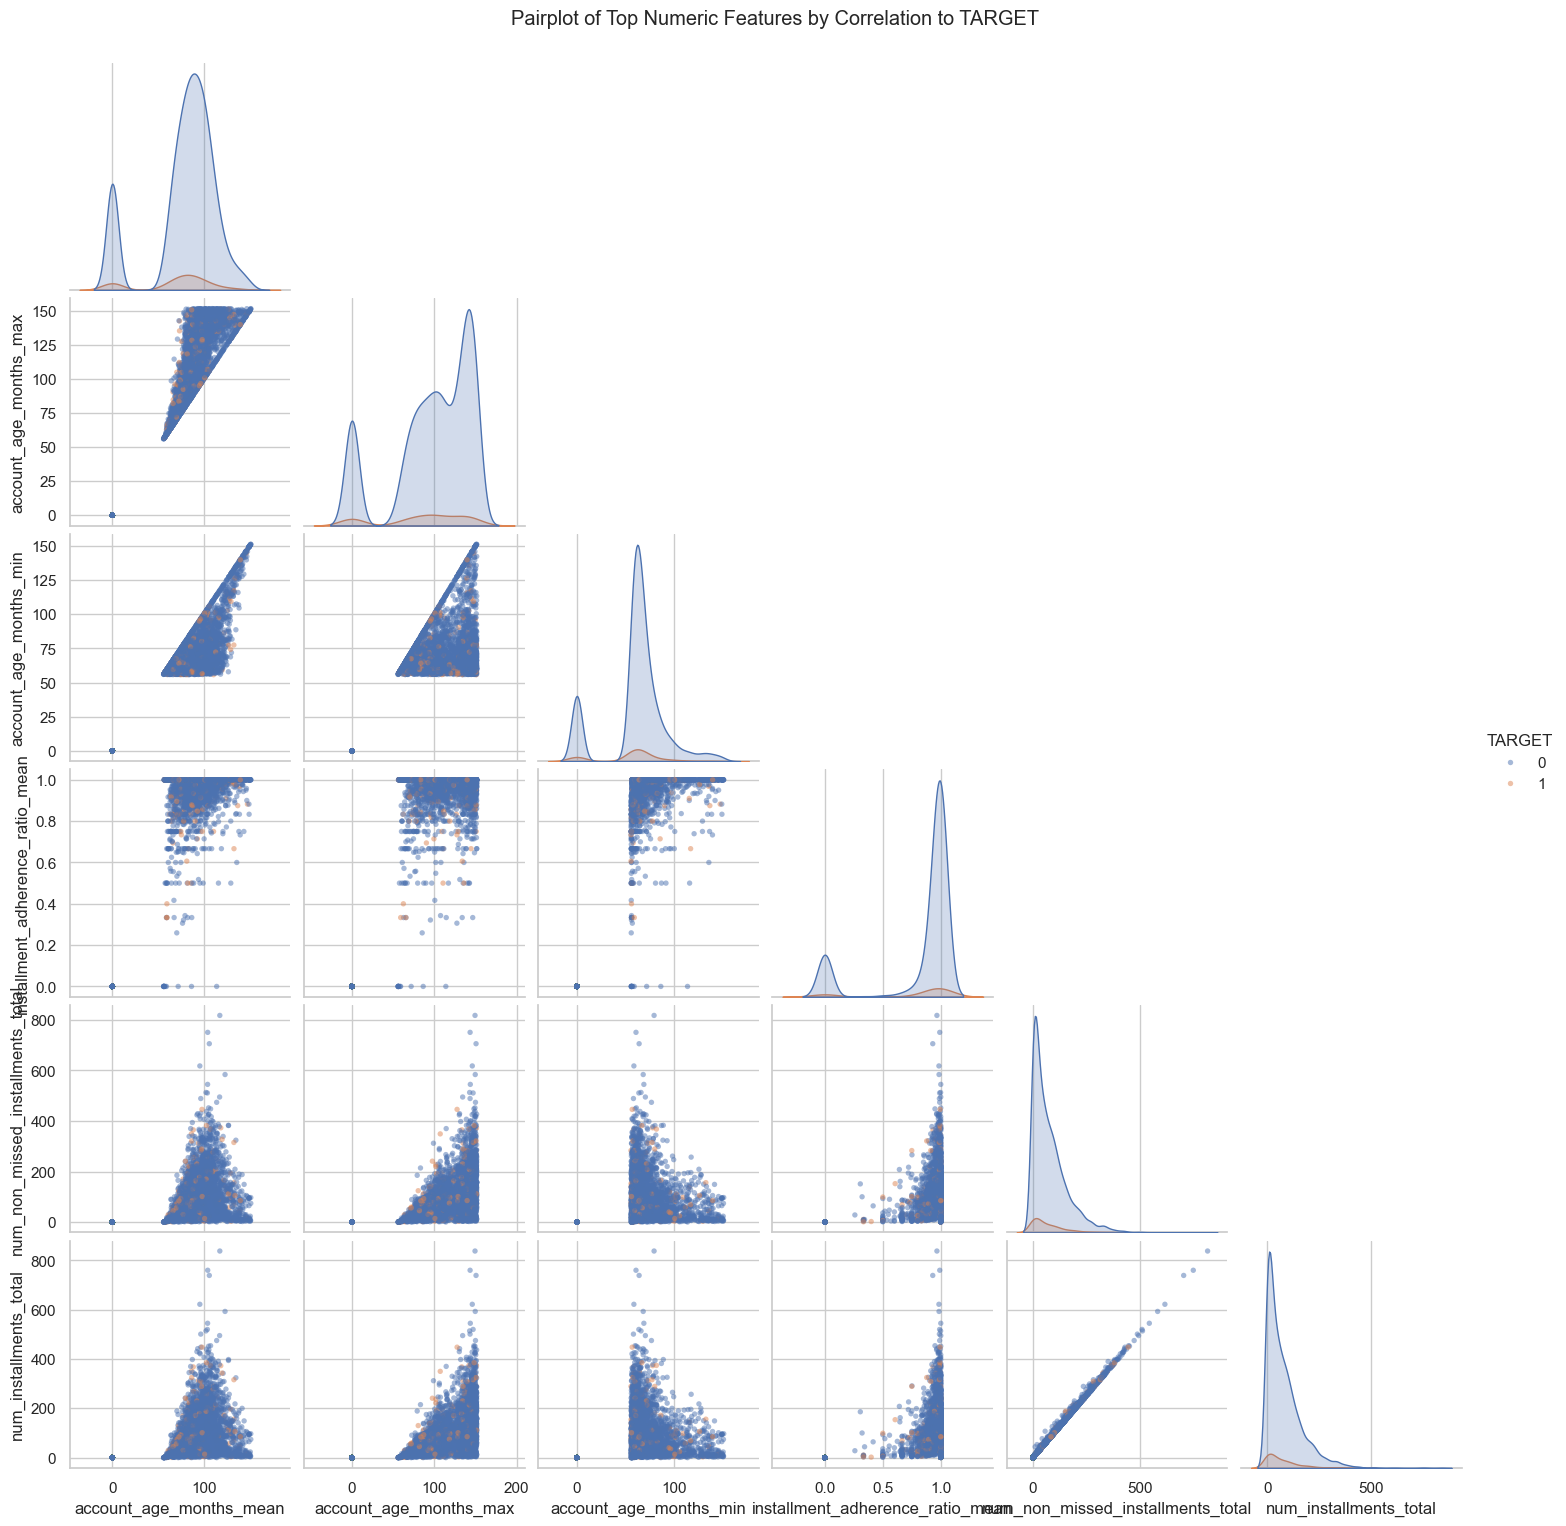

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def pairplot_train_final_simple(df: pd.DataFrame,
                                target_col: str = 'TARGET',
                                max_features: int = 6,
                                sample_rows: int = 5000,
                                random_state: int = 42):
    """
    Creates a Seaborn pairplot on a small subset of numeric features with hue=TARGET.
    - Selects up to max_features numeric columns most correlated (by |Pearson|) with TARGET to keep it readable.
    - Optionally downsamples rows for speed.
    """

    assert target_col in df.columns, f"{target_col} not found"
    # Keep only numeric columns and drop uid if present
    num_df = df.select_dtypes(include=[np.number]).copy()
    if 'uid' in num_df.columns:
        num_df = num_df.drop(columns=['uid'])

    # Drop rows with missing TARGET
    num_df = num_df[num_df[target_col].notna()].copy()

    # Choose top features by absolute Pearson corr to TARGET (excluding TARGET itself)
    corr = num_df.corr(method='pearson')[target_col].drop(labels=[target_col])
    top_feats = corr.abs().sort_values(ascending=False).head(max_features).index.tolist()

    # Fallback: if fewer than 2 features found, just pick any numeric columns
    if len(top_feats) < 2:
        top_feats = [c for c in num_df.columns if c != target_col][:max_features]

    # Prepare plotting DataFrame
    plot_df = num_df[top_feats + [target_col]].copy()

    # Optional sampling for speed/clarity
    if len(plot_df) > sample_rows:
        plot_df = plot_df.sample(n=sample_rows, random_state=random_state)

    # Ensure TARGET is categorical for nicer legends
    plot_df[target_col] = plot_df[target_col].astype(int).astype('category')

    # Pairplot
    sns.set(style='whitegrid')
    g = sns.pairplot(
        plot_df,
        vars=top_feats,
        hue=target_col,
        diag_kind='kde',
        plot_kws={'alpha': 0.5, 's': 15, 'edgecolor': 'none'},
        diag_kws={'fill': True},
        corner=True
    )
    g.fig.suptitle('Pairplot of Top Numeric Features by Correlation to TARGET', y=1.02)
    plt.show()

# Example usage:
pairplot_train_final_simple(train_final_simple, target_col='TARGET', max_features=6, sample_rows=5000)


# 2.2 Enquiry table

In [26]:
train_enquiry.head()

,uid,enquiry_type,enquiry_amt,enquiry_date
0,AAA08065248,Interbank credit,168839,2020-11-08
1,AAA08065248,Mobile operator loan,268392,2020-09-20
2,AAA08065248,Mobile operator loan,36082,2020-06-19
3,AAA08065248,Interbank credit,180467,2019-10-22
4,AAA08065248,Cash loan (non-earmarked),227459,2020-05-24


In [27]:
import pandas as pd
import numpy as np
import re

def _sanitize(x: str) -> str:
    x = '' if pd.isna(x) else str(x)
    x = x.strip().lower()
    x = re.sub(r'[^a-z0-9]+', '_', x)
    x = re.sub(r'_+', '_', x).strip('_')
    return x or 'unknown'

def build_uid_enquiry_features(train_enquiry: pd.DataFrame,
                               uid_col: str = 'uid',
                               type_col: str = 'enquiry_type',
                               amt_col: str = 'enquiry_amt',
                               date_col: str = 'enquiry_date',
                               now_ts: pd.Timestamp = None) -> pd.DataFrame:
    """
    Intuitive enquiry → uid aggregation:
      - Core volume/recency: enquiry_count_total, days_since_last_enquiry
      - Amounts: enquiry_amt_sum/mean/median/max
      - Recent windows (3/6/12m): enquiries_* and amt_*
      - Intensity: enquiries_per_month
      - Type mix: enquiry_types_count + per-type counts (wide, sanitized names)

    Returns one row per uid.
    """
    if train_enquiry is None or train_enquiry.empty:
        return pd.DataFrame(columns=[uid_col])

    df = train_enquiry[[uid_col, type_col, amt_col, date_col]].copy()

    # Clean fields
    df[amt_col] = pd.to_numeric(df[amt_col], errors='coerce').fillna(0)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df[df[uid_col].notna() & df[date_col].notna()].copy()
    if df.empty:
        return pd.DataFrame(columns=[uid_col])

    if now_ts is None:
        now_ts = pd.Timestamp.now(tz=None)

    # Time deltas and recent windows
    df['days_since'] = (now_ts - df[date_col]).dt.days
    df['months_since'] = df['days_since'] / 30.44
    df['in_3m'] = (df['days_since'] >= 0) & (df['days_since'] <= int(round(30.44*3)))
    df['in_6m'] = (df['days_since'] >= 0) & (df['days_since'] <= int(round(30.44*6)))
    df['in_12m'] = (df['days_since'] >= 0) & (df['days_since'] <= int(round(30.44*12)))

    # Core uid aggregates
    core = df.groupby(uid_col).agg(
        enquiry_count_total=(uid_col, 'size'),
        enquiry_amt_sum=(amt_col, 'sum'),
        enquiry_amt_mean=(amt_col, 'mean'),
        enquiry_amt_median=(amt_col, 'median'),
        enquiry_amt_max=(amt_col, 'max'),
        first_enquiry_date=(date_col, 'min'),
        last_enquiry_date=(date_col, 'max'),
        days_since_last_enquiry=('days_since', 'min')
    ).reset_index()

    # Recent window aggregates (counts and amounts)
    rec = df.groupby(uid_col).agg(
        enquiries_3m=('in_3m', 'sum'),
        enquiries_6m=('in_6m', 'sum'),
        enquiries_12m=('in_12m', 'sum'),
        amt_3m=(amt_col, lambda x: x[df.loc[x.index, 'in_3m']].sum()),
        amt_6m=(amt_col, lambda x: x[df.loc[x.index, 'in_6m']].sum()),
        amt_12m=(amt_col, lambda x: x[df.loc[x.index, 'in_12m']].sum())
    ).reset_index()

    # Type mix (counts per type) and number of distinct types
    df['type_sanitized'] = df[type_col].apply(_sanitize)
    type_counts = (df.groupby([uid_col, 'type_sanitized'])
                     .size()
                     .reset_index(name='count')
                     .pivot(index=uid_col, columns='type_sanitized', values='count')
                     .fillna(0).astype(int)
                  )
    type_counts.columns = [f'enquiry_type_COUNT_{c}' for c in type_counts.columns]
    type_counts = type_counts.reset_index()

    types_cnt = df.groupby(uid_col)[type_col].nunique().reset_index(name='enquiry_types_count')

    # Merge all pieces (uid-level)
    out = core.merge(rec, on=uid_col, how='left') \
              .merge(types_cnt, on=uid_col, how='left') \
              .merge(type_counts, on=uid_col, how='left')

    # Intensity: enquiries per month since first enquiry
    months_active = ((now_ts - out['first_enquiry_date']).dt.days / 30.44).clip(lower=1e-6)
    out['enquiries_per_month'] = out['enquiry_count_total'] / months_active

    # Final ordering: core first, then types
    core_cols = [
        uid_col,
        'enquiry_count_total',
        'days_since_last_enquiry',
        'enquiry_amt_sum','enquiry_amt_mean','enquiry_amt_median','enquiry_amt_max',
        'enquiries_3m','enquiries_6m','enquiries_12m',
        'amt_3m','amt_6m','amt_12m',
        'enquiries_per_month',
        'enquiry_types_count'
    ]
    type_cols = [c for c in out.columns if c.startswith('enquiry_type_COUNT_')]
    final_cols = [c for c in core_cols if c in out.columns] + sorted(type_cols)
    out = out[final_cols].fillna(0)

    return out



In [28]:
# Build uid-level features (one row per uid)
uid_enquiry_features = build_uid_enquiry_features(train_enquiry,
                                                  uid_col='uid',
                                                  type_col='enquiry_type',
                                                  amt_col='enquiry_amt',
                                                  date_col='enquiry_date')

In [30]:
len(uid_enquiry_features)

261383

In [29]:
uid_enquiry_features.head()

,uid,enquiry_count_total,days_since_last_enquiry,enquiry_amt_sum,enquiry_amt_mean,enquiry_amt_median,enquiry_amt_max,enquiries_3m,enquiries_6m,enquiries_12m,amt_3m,amt_6m,amt_12m,enquiries_per_month,enquiry_types_count,enquiry_type_COUNT_another_type_of_loan,enquiry_type_COUNT_car_loan,enquiry_type_COUNT_cash_loan_non_earmarked,enquiry_type_COUNT_cash_loans,enquiry_type_COUNT_consumer_credit,enquiry_type_COUNT_credit_card,enquiry_type_COUNT_interbank_credit,enquiry_type_COUNT_loan_for_business_development,enquiry_type_COUNT_loan_for_purchase_of_shares_margin_lending,enquiry_type_COUNT_loan_for_the_purchase_of_equipment,enquiry_type_COUNT_loan_for_working_capital_replenishment,enquiry_type_COUNT_microloan,enquiry_type_COUNT_mobile_operator_loan,enquiry_type_COUNT_mortgage,enquiry_type_COUNT_real_estate_loan,enquiry_type_COUNT_revolving_loans,enquiry_type_COUNT_unknown_type_of_loan
0,AAA08065248,11,1695,2064658,187696.181818,169056.0,364751,0,0,0,0,0,0,0.141581,6,0,0,1,0,0,0,3,0,2,0,0,0,2,1,0,2,0
1,AAA09044550,26,1696,2659000,102269.230769,106500.0,197000,0,0,0,0,0,0,0.276244,14,3,3,1,7,1,1,2,0,0,1,0,2,1,1,1,1,1
2,AAA10545297,14,1757,1317000,94071.428571,94000.0,192000,0,0,0,0,0,0,0.163719,9,1,0,2,2,2,2,1,0,1,0,0,0,0,0,0,2,1
3,AAA14112888,15,1873,1465000,97666.666667,95000.0,185000,0,0,0,0,0,0,0.149607,10,1,0,1,1,2,0,1,0,2,2,2,0,2,0,0,0,1
4,AAA20326915,1,1833,66000,66000.000000,66000.0,66000,0,0,0,0,0,0,0.016607,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
uid_enquiry_features_target = pd.merge(
    uid_enquiry_features,
    train_flag[['uid', 'TARGET']],  # safer to keep only necessary columns
    on='uid',
    how='left'
)

In [34]:
# Drop uid (identifier)
corr_df = (
    uid_enquiry_features_target
    .drop(columns=['uid'])
    .corr(numeric_only=True)  # only numeric columns
)

# Extract correlations with TARGET, sort by absolute value
target_corr = corr_df['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)

print("Top correlated features with TARGET:")
print(target_corr.head(10))  # top 10 features


Top correlated features with TARGET:
days_since_last_enquiry                0.032345
enquiry_amt_max                       -0.022933
enquiry_amt_mean                      -0.020800
enquiry_amt_median                    -0.018934
enquiries_per_month                   -0.010685
enquiry_type_COUNT_revolving_loans    -0.009054
enquiry_amt_sum                       -0.008562
enquiry_type_COUNT_car_loan            0.004761
enquiry_type_COUNT_credit_card         0.004485
enquiry_type_COUNT_real_estate_loan    0.003442
Name: TARGET, dtype: float64


In [35]:
# Feature engineering
def engineer_enquiry_features(df):
    df = df.copy()

    # --- Ratios ---
    df["amt_per_enquiry"] = df["enquiry_amt_sum"] / df["enquiry_count_total"].replace(0, 1)
    df["max_to_mean_amt"] = df["enquiry_amt_max"] / df["enquiry_amt_mean"].replace(0, 1)
    df["mean_to_median_amt"] = df["enquiry_amt_mean"] / df["enquiry_amt_median"].replace(0, 1)
    df["sum_to_max_amt"] = df["enquiry_amt_sum"] / df["enquiry_amt_max"].replace(0, 1)

    # --- Recency dynamics ---
    df["recent_enquiry_ratio_3m"] = df["enquiries_3m"] / df["enquiry_count_total"].replace(0, 1)
    df["recent_enquiry_ratio_6m"] = df["enquiries_6m"] / df["enquiry_count_total"].replace(0, 1)
    df["recent_enquiry_ratio_12m"] = df["enquiries_12m"] / df["enquiry_count_total"].replace(0, 1)

    df["recent_amt_ratio_3m"] = df["amt_3m"] / df["enquiry_amt_sum"].replace(0, 1)
    df["recent_amt_ratio_6m"] = df["amt_6m"] / df["enquiry_amt_sum"].replace(0, 1)
    df["recent_amt_ratio_12m"] = df["amt_12m"] / df["enquiry_amt_sum"].replace(0, 1)

    # Type diversity
    type_cols = [c for c in df.columns if c.startswith("enquiry_type_COUNT_")]
    df["enquiry_type_diversity"] = (df[type_cols] > 0).sum(axis=1) / len(type_cols)

    # Flags
    df["many_types_flag"] = (df["enquiry_types_count"] > 5).astype(int)
    df["large_recent_jump"] = (df["recent_enquiry_ratio_3m"] > 0.5).astype(int)

    # Velocity
    df["enquiries_per_day"] = df["enquiry_count_total"] / df["days_since_last_enquiry"].replace(0, 1)

    return df


# --- Apply on your data ---
uid_enquiry_features_target_fe = engineer_enquiry_features(uid_enquiry_features_target)

# --- Correlation check ---
corr_df = uid_enquiry_features_target_fe.drop(columns=['uid']).corr(numeric_only=True)
target_corr = corr_df['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)

print("Top correlated features with TARGET after feature engineering:")
print(target_corr.head(15))


Top correlated features with TARGET after feature engineering:
days_since_last_enquiry                                          0.032345
enquiry_amt_max                                                 -0.022933
enquiry_amt_mean                                                -0.020800
amt_per_enquiry                                                 -0.020800
enquiry_amt_median                                              -0.018934
enquiries_per_month                                             -0.010685
enquiry_type_COUNT_revolving_loans                              -0.009054
enquiry_amt_sum                                                 -0.008562
enquiry_type_COUNT_car_loan                                      0.004761
enquiry_type_COUNT_credit_card                                   0.004485
enquiry_type_COUNT_real_estate_loan                              0.003442
enquiry_type_COUNT_loan_for_purchase_of_shares_margin_lending    0.003104
enquiry_type_COUNT_cash_loans                    

In [40]:
#checking if enquiry features alone can predict the target


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# --- Prepare data ---
X = uid_enquiry_features_target_fe.drop(columns=['uid', 'TARGET'])
y = uid_enquiry_features_target_fe['TARGET']

# Train/test split (stratified to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# --- Scale features (important for Logistic Regression) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train logistic regression ---
clf = LogisticRegression(max_iter=1000, class_weight="balanced", solver="lbfgs")
clf.fit(X_train_scaled, y_train)

# --- Predict and evaluate ---
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC (Logistic Regression): {auc:.4f}")


ROC AUC (Logistic Regression): 0.6005


**This score is similar for what our Accounts Table was able to predict**

So we are quite okay with the features we have created for train dataset of Account and Enquiry 
we need to make sure 
1. same features we can reproduce for test dataset counter parts
2. Make sure no data leaks are there
3. combine them and do the prediction

In [43]:
""" For Enquiry table"""

#Training set
uid_enquiry_features_target_fe.head(1)

uid_enquiry_features_target_fe=uid_enquiry_features_target_fe.drop(columns=['TARGET'])

In [44]:
# same preprocessing for test set is requred

test_uid_enquiry_features = build_uid_enquiry_features(test_enquiry,
                                                  uid_col='uid',
                                                  type_col='enquiry_type',
                                                  amt_col='enquiry_amt',
                                                  date_col='enquiry_date')
test_uid_enquiry_features_target_fe = engineer_enquiry_features(test_uid_enquiry_features)
test_uid_enquiry_features_target_fe.head(1)

,uid,enquiry_count_total,days_since_last_enquiry,enquiry_amt_sum,enquiry_amt_mean,enquiry_amt_median,enquiry_amt_max,enquiries_3m,enquiries_6m,enquiries_12m,amt_3m,amt_6m,amt_12m,enquiries_per_month,enquiry_types_count,enquiry_type_COUNT_another_type_of_loan,enquiry_type_COUNT_car_loan,enquiry_type_COUNT_cash_loan_non_earmarked,enquiry_type_COUNT_cash_loans,enquiry_type_COUNT_consumer_credit,enquiry_type_COUNT_credit_card,enquiry_type_COUNT_interbank_credit,enquiry_type_COUNT_loan_for_business_development,enquiry_type_COUNT_loan_for_purchase_of_shares_margin_lending,enquiry_type_COUNT_loan_for_the_purchase_of_equipment,enquiry_type_COUNT_loan_for_working_capital_replenishment,enquiry_type_COUNT_microloan,enquiry_type_COUNT_mobile_operator_loan,enquiry_type_COUNT_mortgage,enquiry_type_COUNT_real_estate_loan,enquiry_type_COUNT_revolving_loans,enquiry_type_COUNT_unknown_type_of_loan,amt_per_enquiry,max_to_mean_amt,mean_to_median_amt,sum_to_max_amt,recent_enquiry_ratio_3m,recent_enquiry_ratio_6m,recent_enquiry_ratio_12m,recent_amt_ratio_3m,recent_amt_ratio_6m,recent_amt_ratio_12m,enquiry_type_diversity,many_types_flag,large_recent_jump,enquiries_per_day
0,AAA02107680,1,1712,143000,143000.0,143000.0,143000,0,0,0,0,0,0,0.01778,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143000.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0,0,0.000584


In [45]:
train_cols = set(uid_enquiry_features_target_fe.columns)
test_cols = set(test_uid_enquiry_features_target_fe.columns)

# Check for differences
only_in_train = train_cols - test_cols
only_in_test = test_cols - train_cols

print("Columns only in TRAIN:", only_in_train)
print("Columns only in TEST:", only_in_test)

# Check if column order matches (important for models)
same_order = list(uid_enquiry_features_target_fe.columns) == list(test_uid_enquiry_features_target_fe.columns)
print("Same column order:", same_order)

# Also compare counts
print(f"Train columns: {len(train_cols)}")
print(f"Test columns : {len(test_cols)}")


Columns only in TRAIN: set()
Columns only in TEST: set()
Same column order: True
Train columns: 46
Test columns : 46


In [46]:
""" For Accounts  table"""

#final train dataframe
train_final_simple.head(1)

,uid,NAME_CONTRACT_TYPE,TARGET,num_installments_total,num_missed_installments_total,num_non_missed_installments_total,overdue_ratio_mean,worst_dpd_ever_max,recent_worst_dpd_3m_max,last_month_dpd_max,installment_adherence_ratio_mean,regularly_missed_flag_any,dpd_30_count_total,dpd_60_count_total,dpd_90plus_count_total,account_age_months_mean,account_age_months_min,account_age_months_max,total_accounts,credit_types_count,credit_type_COUNT_another_type_of_loan,credit_type_COUNT_car_loan,credit_type_COUNT_cash_loan_non_earmarked,credit_type_COUNT_consumer_credit,credit_type_COUNT_credit_card,credit_type_COUNT_interbank_credit,credit_type_COUNT_loan_for_business_development,credit_type_COUNT_loan_for_purchase_of_shares_margin_lending,credit_type_COUNT_loan_for_the_purchase_of_equipment,credit_type_COUNT_loan_for_working_capital_replenishment,credit_type_COUNT_microloan,credit_type_COUNT_mobile_operator_loan,credit_type_COUNT_mortgage,credit_type_COUNT_real_estate_loan,credit_type_COUNT_unknown_type_of_loan
0,XDA69787158,Cash loans,0,39.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.645204,94.645204,94.645204,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# test final for account
test_final_simple.head(1)

,uid,NAME_CONTRACT_TYPE,num_installments_total,num_missed_installments_total,num_non_missed_installments_total,overdue_ratio_mean,worst_dpd_ever_max,recent_worst_dpd_3m_max,last_month_dpd_max,installment_adherence_ratio_mean,regularly_missed_flag_any,dpd_30_count_total,dpd_60_count_total,dpd_90plus_count_total,account_age_months_mean,account_age_months_min,account_age_months_max,total_accounts,credit_types_count,credit_type_COUNT_another_type_of_loan,credit_type_COUNT_car_loan,credit_type_COUNT_cash_loan_non_earmarked,credit_type_COUNT_consumer_credit,credit_type_COUNT_credit_card,credit_type_COUNT_loan_for_business_development,credit_type_COUNT_loan_for_the_purchase_of_equipment,credit_type_COUNT_loan_for_working_capital_replenishment,credit_type_COUNT_microloan,credit_type_COUNT_mortgage,credit_type_COUNT_real_estate_loan,credit_type_COUNT_unknown_type_of_loan
0,CMO22835242,Cash loans,186.0,1.0,185.0,0.002137,5.0,0.0,0.0,0.997863,0.0,0.0,0.0,0.0,114.613868,79.862024,148.653088,13.0,4.0,0.0,1.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
# Compare column sets
train_cols = set(train_final_simple.columns)
test_cols = set(test_final_simple.columns)

only_in_train = train_cols - test_cols
only_in_test = test_cols - train_cols

print("Columns only in TRAIN:", only_in_train)
print("Columns only in TEST :", only_in_test)

# Check order
same_order = list(train_final_simple.columns) == list(test_final_simple.columns)
print("Same column order:", same_order)

print(f"Train columns: {len(train_cols)}")
print(f"Test columns : {len(test_cols)}")


Columns only in TRAIN: {'credit_type_COUNT_loan_for_purchase_of_shares_margin_lending', 'TARGET', 'credit_type_COUNT_interbank_credit', 'credit_type_COUNT_mobile_operator_loan'}
Columns only in TEST : set()
Same column order: False
Train columns: 35
Test columns : 31


In [57]:
# --- Step 1: Drop TARGET from train_final_simple ---
if "TARGET" in train_final_simple.columns:
    train_final_simple = train_final_simple.drop(columns=["TARGET"])

# --- Step 2: Ensure required columns exist in test_final_simple ---
required_cols = [
    "credit_type_COUNT_loan_for_purchase_of_shares_margin_lending",
    "credit_type_COUNT_interbank_credit",
    "credit_type_COUNT_mobile_operator_loan"
]

for col in required_cols:
    if col not in test_final_simple.columns:
        test_final_simple[col] = 0

# --- Step 3: Ensure same column order ---
test_final_simple = test_final_simple[train_final_simple.columns]

print("Train columns:", len(train_final_simple.columns))
print("Test columns :", len(test_final_simple.columns))


Train columns: 34
Test columns : 34


now both Tables Train and Test Data set is ready

# Train Tables are 
train_final_simple,uid_enquiry_features_target_fe , train_flag

# test table are
test_final_simple,test_uid_enquiry_features_target_fe,test_flag

In [59]:
#renaming for convenience
train_accounts_uid_level = train_final_simple
train_enquiry_merged = uid_enquiry_features_target_fe
test_accounts_uid_level = test_final_simple
test_enquiry_merged = test_uid_enquiry_features_target_fe

# checking number of rows as all dataframe are set to uid level

In [60]:
print("df_uid_level_enquiry_train:", len(train_enquiry_merged))
print("df_uid_level_account_train:", len(train_accounts_uid_level))
print("train_flag                :", len(train_flag))
print("df_uid_level_enquiry_test :", len(test_enquiry_merged))

print("df_uid_level_account_test :", len(test_accounts_uid_level))

print("test_flag                 :", len(test_flag))


df_uid_level_enquiry_train: 261383
df_uid_level_account_train: 261383
train_flag                : 261383
df_uid_level_enquiry_test : 46127
df_uid_level_account_test : 46127
test_flag                 : 46127


In [62]:
na_rows = train_accounts_uid_level.isna().any(axis=1).sum()
print("Rows with NA in df_uid_level_account_train:", na_rows)


Rows with NA in df_uid_level_account_train: 0


In [63]:
train_accounts_uid_level.head()

,uid,NAME_CONTRACT_TYPE,num_installments_total,num_missed_installments_total,num_non_missed_installments_total,overdue_ratio_mean,worst_dpd_ever_max,recent_worst_dpd_3m_max,last_month_dpd_max,installment_adherence_ratio_mean,regularly_missed_flag_any,dpd_30_count_total,dpd_60_count_total,dpd_90plus_count_total,account_age_months_mean,account_age_months_min,account_age_months_max,total_accounts,credit_types_count,credit_type_COUNT_another_type_of_loan,credit_type_COUNT_car_loan,credit_type_COUNT_cash_loan_non_earmarked,credit_type_COUNT_consumer_credit,credit_type_COUNT_credit_card,credit_type_COUNT_interbank_credit,credit_type_COUNT_loan_for_business_development,credit_type_COUNT_loan_for_purchase_of_shares_margin_lending,credit_type_COUNT_loan_for_the_purchase_of_equipment,credit_type_COUNT_loan_for_working_capital_replenishment,credit_type_COUNT_microloan,credit_type_COUNT_mobile_operator_loan,credit_type_COUNT_mortgage,credit_type_COUNT_real_estate_loan,credit_type_COUNT_unknown_type_of_loan
0,XDA69787158,Cash loans,39.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.645204,94.645204,94.645204,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BSE47789733,Cash loans,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,82.818660,82.818660,82.818660,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NTJ92213825,Cash loans,10.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,139.027595,139.027595,139.027595,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCQ47571695,Cash loans,70.0,0.0,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.331143,68.035480,132.621551,3.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WJZ68772744,Cash loans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Drop uid and NAME_CONTRACT_TYPE for the zero-check
mask_all_zero = (train_accounts_uid_level
                 .drop(columns=['uid', 'NAME_CONTRACT_TYPE'])
                 .eq(0)
                 .all(axis=1))

# Count such rows
all_zero_rows = mask_all_zero.sum()
print("Rows where every column is 0 except uid and NAME_CONTRACT_TYPE:", all_zero_rows)


Rows where every column is 0 except uid and NAME_CONTRACT_TYPE: 37466


These rows belong to uids whuch are in Flag but not in train dataset , so seperating them will be better
if uid in train_accounts_uid_level not in train_accounts then drop the row
if uid in test_accounts_uid_level not in test_accounts then drop the row

In [65]:
# --- Train ---
train_accounts_uid_level = train_accounts_uid_level[
    train_accounts_uid_level['uid'].isin(train_accounts['uid'].unique())
].reset_index(drop=True)

# --- Test ---
test_accounts_uid_level = test_accounts_uid_level[
    test_accounts_uid_level['uid'].isin(test_accounts['uid'].unique())
].reset_index(drop=True)

print("After filtering:")
print("Train Accounts UID Level:", train_accounts_uid_level.shape)
print("Test Accounts UID Level:", test_accounts_uid_level.shape)


After filtering:
Train Accounts UID Level: (223917, 34)
Test Accounts UID Level: (39572, 34)


In [66]:
print("df_uid_level_enquiry_train:", len(train_enquiry_merged))
print("df_uid_level_account_train:", len(train_accounts_uid_level))
print("train_flag                :", len(train_flag))
print("df_uid_level_enquiry_test :", len(test_enquiry_merged))

print("df_uid_level_account_test :", len(test_accounts_uid_level))

print("test_flag                 :", len(test_flag))


df_uid_level_enquiry_train: 261383
df_uid_level_account_train: 223917
train_flag                : 261383
df_uid_level_enquiry_test : 46127
df_uid_level_account_test : 39572
test_flag                 : 46127


**Summary of rows matching**
1. Both account dataset in train and test are missing exact 14% of uids
2. where else enquiry row matches with flag datasets in both cases
3. It means its a systematic error which can be impacted due to faulty pipeline


**We can seperate the data sets into further two part model system**
1. enquiry only ( uids which does not exist in accounts)
2.  accounts+ enquiry

# Preparing data for two seperate model 1. with Account+ enquiry Data  2. only Enquiry Data

In [68]:
""" Train data modification """

# 1. Merge dataframes
train_full_data = (
    train_flag
    .merge(train_enquiry_merged, on="uid", how="left")
    .merge(train_accounts_uid_level, on="uid", how="left")
)

# 2. One-hot encode contract type if present
if "NAME_CONTRACT_TYPE" in train_full_data.columns:
    train_full_data = pd.get_dummies(
        train_full_data,
        columns=["NAME_CONTRACT_TYPE"],
        prefix="contract",
        drop_first=True
    )
    dummy_cols = [col for col in train_full_data.columns if col.startswith("contract_")]
    train_full_data[dummy_cols] = train_full_data[dummy_cols].astype(int)

# 3. Identify actual account-level columns after merge
account_cols = [col for col in train_accounts_uid_level.columns if col != "uid"]
account_cols = [col for col in account_cols if col in train_full_data.columns]

# 4a. Enquiry-only rows (all account columns are NaN)
train_data_only_enquiry = train_full_data[
    train_full_data[account_cols].isna().all(axis=1)
].copy()
train_data_only_enquiry = train_data_only_enquiry.drop(columns=account_cols)

# 4b. Enquiry + account rows (rest)
train_data_enquiry_n_account = train_full_data.drop(train_data_only_enquiry.index)

# Drop any duplicate columns just in case
train_full_data = train_full_data.loc[:, ~train_full_data.columns.duplicated()]
train_data_only_enquiry = train_data_only_enquiry.loc[:, ~train_data_only_enquiry.columns.duplicated()]
train_data_enquiry_n_account = train_data_enquiry_n_account.loc[:, ~train_data_enquiry_n_account.columns.duplicated()]

# 5. Sanity check
print("Full data length: ", len(train_full_data))
print("Enquiry only length: ", len(train_data_only_enquiry))
print("Enquiry + account length: ", len(train_data_enquiry_n_account))
print("Check sum equals full:",
      len(train_data_only_enquiry) + len(train_data_enquiry_n_account) == len(train_full_data))


Full data length:  261383
Enquiry only length:  37466
Enquiry + account length:  223917
Check sum equals full: True


In [69]:
""" Test data modification """

# 1. Merge dataframes
test_full_data = (
    test_flag
    .merge(test_enquiry_merged, on="uid", how="left")
    .merge(test_accounts_uid_level, on="uid", how="left")
)

# 2. One-hot encode contract type if present
if "NAME_CONTRACT_TYPE" in test_full_data.columns:
    test_full_data = pd.get_dummies(
        test_full_data,
        columns=["NAME_CONTRACT_TYPE"],
        prefix="contract",
        drop_first=True
    )
    dummy_cols = [col for col in test_full_data.columns if col.startswith("contract_")]
    test_full_data[dummy_cols] = test_full_data[dummy_cols].astype(int)

# 3. Identify actual account-level columns after merge
account_cols = [col for col in test_accounts_uid_level.columns if col != "uid"]
account_cols = [col for col in account_cols if col in test_full_data.columns]

# 4a. Enquiry-only rows (all account columns are NaN)
test_data_only_enquiry = test_full_data[
    test_full_data[account_cols].isna().all(axis=1)
].copy()
test_data_only_enquiry = test_data_only_enquiry.drop(columns=account_cols)

# 4b. Enquiry + account rows (rest)
test_data_enquiry_n_account = test_full_data.drop(test_data_only_enquiry.index)

# Drop any duplicate columns
test_full_data = test_full_data.loc[:, ~test_full_data.columns.duplicated()]
test_data_only_enquiry = test_data_only_enquiry.loc[:, ~test_data_only_enquiry.columns.duplicated()]
test_data_enquiry_n_account = test_data_enquiry_n_account.loc[:, ~test_data_enquiry_n_account.columns.duplicated()]

# 5. Sanity check
print("Full data length: ", len(test_full_data))
print("Enquiry only length: ", len(test_data_only_enquiry))
print("Enquiry + account length: ", len(test_data_enquiry_n_account))
print("Check sum equals full:",
      len(test_data_only_enquiry) + len(test_data_enquiry_n_account) == len(test_full_data))


Full data length:  46127
Enquiry only length:  6555
Enquiry + account length:  39572
Check sum equals full: True


In [70]:
# Function to check shape before and after dropping duplicate columns
def check_shape_before_after(df, name):
    print(f"=== {name} ===")
    print("Shape before dropping duplicates:", df.shape)
    df_clean = df.loc[:, ~df.columns.duplicated()]
    print("Shape after dropping duplicates :", df_clean.shape)
    print("-" * 40)
    return df_clean

# Train datasets
train_full_data = check_shape_before_after(train_full_data, "train_full_data")
train_data_only_enquiry = check_shape_before_after(train_data_only_enquiry, "train_data_only_enquiry")
train_data_enquiry_n_account = check_shape_before_after(train_data_enquiry_n_account, "train_data_enquiry_n_account")

# Test datasets
test_full_data = check_shape_before_after(test_full_data, "test_full_data")
test_data_only_enquiry = check_shape_before_after(test_data_only_enquiry, "test_data_only_enquiry")
test_data_enquiry_n_account = check_shape_before_after(test_data_enquiry_n_account, "test_data_enquiry_n_account")


=== train_full_data ===
Shape before dropping duplicates: (261383, 81)
Shape after dropping duplicates : (261383, 81)
----------------------------------------
=== train_data_only_enquiry ===
Shape before dropping duplicates: (37466, 49)
Shape after dropping duplicates : (37466, 49)
----------------------------------------
=== train_data_enquiry_n_account ===
Shape before dropping duplicates: (223917, 81)
Shape after dropping duplicates : (223917, 81)
----------------------------------------
=== test_full_data ===
Shape before dropping duplicates: (46127, 80)
Shape after dropping duplicates : (46127, 80)
----------------------------------------
=== test_data_only_enquiry ===
Shape before dropping duplicates: (6555, 48)
Shape after dropping duplicates : (6555, 48)
----------------------------------------
=== test_data_enquiry_n_account ===
Shape before dropping duplicates: (39572, 80)
Shape after dropping duplicates : (39572, 80)
----------------------------------------


In [71]:
## Saving that data in case
# File paths
train_full_path = r"C:\Users\droxr\Downloads\senior_ds_test\train_full_data.csv"
train_only_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\train_data_only_enquiry.csv"
train_enquiry_n_account_path = r"C:\Users\droxr\Downloads\senior_ds_test\train_data_enquiry_n_account.csv"

test_full_path = r"C:\Users\droxr\Downloads\senior_ds_test\test_full_data.csv"
test_only_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\test_data_only_enquiry.csv"
test_enquiry_n_account_path = r"C:\Users\droxr\Downloads\senior_ds_test\test_data_enquiry_n_account.csv"

# Save CSVs
train_full_data.to_csv(train_full_path, index=False)
train_data_only_enquiry.to_csv(train_only_enquiry_path, index=False)
train_data_enquiry_n_account.to_csv(train_enquiry_n_account_path, index=False)

test_full_data.to_csv(test_full_path, index=False)
test_data_only_enquiry.to_csv(test_only_enquiry_path, index=False)
test_data_enquiry_n_account.to_csv(test_enquiry_n_account_path, index=False)

print("All six DataFrames have been saved successfully!")


All six DataFrames have been saved successfully!
